In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

### Task 4

In [5]:
def chaotic_exp(r, x0=0.1, maxstep=100):
    xn = x0
    for i in range(maxstep):
        xn = r*xn*(1-xn)
        yield xn

def task4_plot(r):
    t=np.arange(100)
    xn=[]
    for x in chaotic_exp(r):
        xn.append(x)

    plt.xlabel("N")
    plt.ylabel("$X_n$")
    plt.ylim((0,1))
    plt.plot(t, xn)
    plt.title("test")
    plt.show()

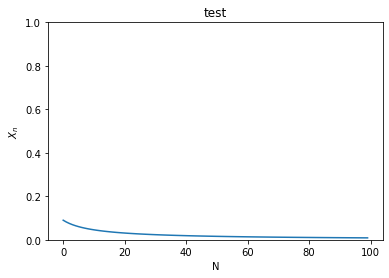

In [11]:
task4_plot(r=1)

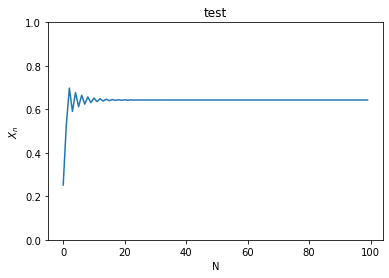

In [6]:
task4_plot(r=2.8)

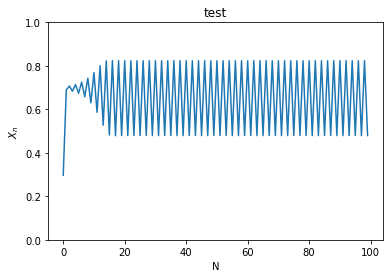

In [8]:
task4_plot(r=3.3)

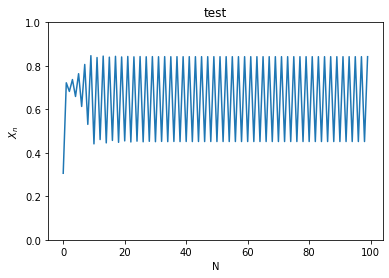

In [10]:
task4_plot(r=3.4)

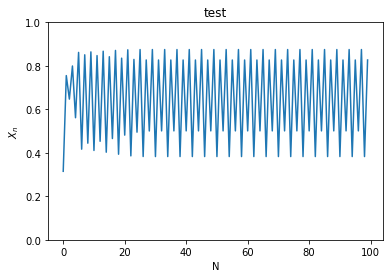

In [9]:
task4_plot(r=3.5)

In [ ]:
task4_plot(r=3.3)

bifurcation diagram

100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 3940.43it/s]


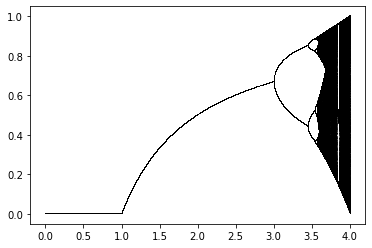

In [7]:
def LogisticMap():
    r = np.arange(0, 4, 0.0001)
    x = 0.2 
    iters = 1000
    last = 100
    for i in tqdm(range(iters+last)):
        x = r * x * (1 - x)
        if i >= iters:
            plt.plot(r, x, ',k', alpha=0.25)
    plt.show()
    
LogisticMap()

Lorenz attractor σ = 10,β = 8/3, and ρ = 28.

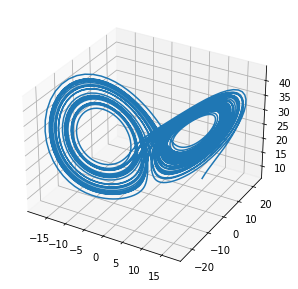

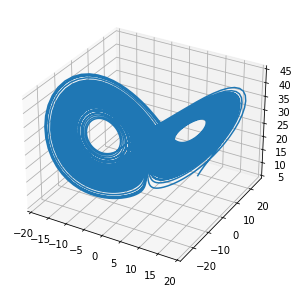

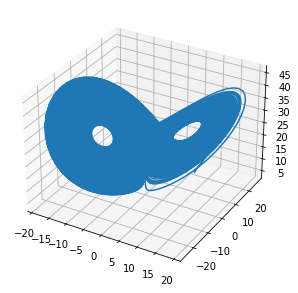

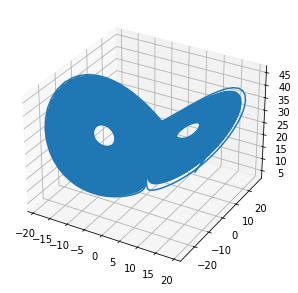

In [12]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0, 10.0, 10.0]
t = np.arange(0.0, 1000.0, 0.01)

states = odeint(f, state0, t)


fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.gca(projection="3d")
ax1.plot(states[0:5000, 0], states[0:5000, 1], states[0:5000, 2])

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.gca(projection="3d")
ax2.plot(states[:20000, 0], states[:20000, 1], states[:20000, 2])

fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.gca(projection="3d")
ax3.plot(states[:50000, 0], states[:50000, 1], states[:50000, 2])

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.gca(projection="3d")
ax4.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

Test this by plotting another trajectory

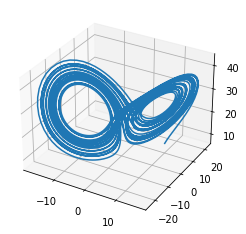

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0+10**(-8), 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

change the parameter ρ to the value 0.5

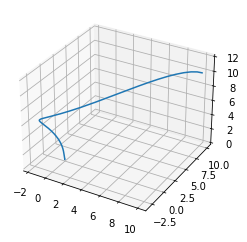

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 0.5
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0, 10.0, 10.0]
t = np.arange(0.0, 1000.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

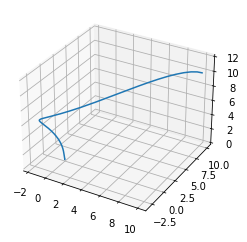

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 0.5 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0+10**(-8), 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

new solver

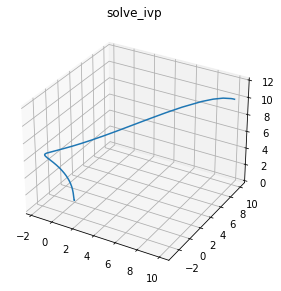

In [16]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 0.5
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0, 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig = plt.figure(figsize=(10,10))
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

plt.show()

ρ=28，且初始点

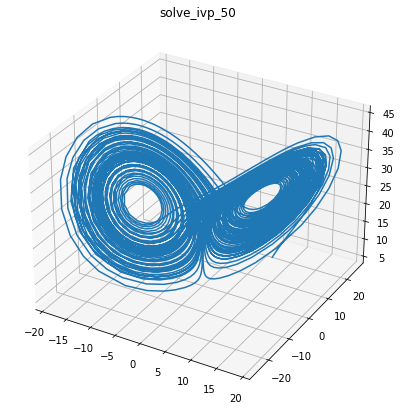

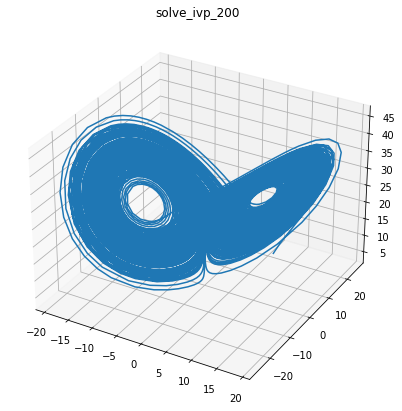

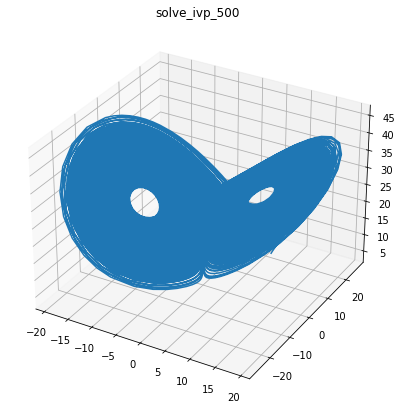

In [26]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0, 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(1, 2, 2, projection='3d')
ax1.plot(result_solve_ivp.y[0, 0:5000],
        result_solve_ivp.y[1, 0:5000],
        result_solve_ivp.y[2, 0:5000])
ax1.set_title("solve_ivp_50")

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(1, 2, 2, projection='3d')
ax2.plot(result_solve_ivp.y[0, 0:20000],
        result_solve_ivp.y[1, 0:20000],
        result_solve_ivp.y[2, 0:20000])
ax2.set_title("solve_ivp_200")

fig3 = plt.figure(figsize=(15,15))
ax3 = fig3.add_subplot(1, 2, 2, projection='3d')
ax3.plot(result_solve_ivp.y[0, 0:50000],
        result_solve_ivp.y[1, 0:50000],
        result_solve_ivp.y[2, 0:50000])
ax3.set_title("solve_ivp_500")
plt.draw()
plt.show()

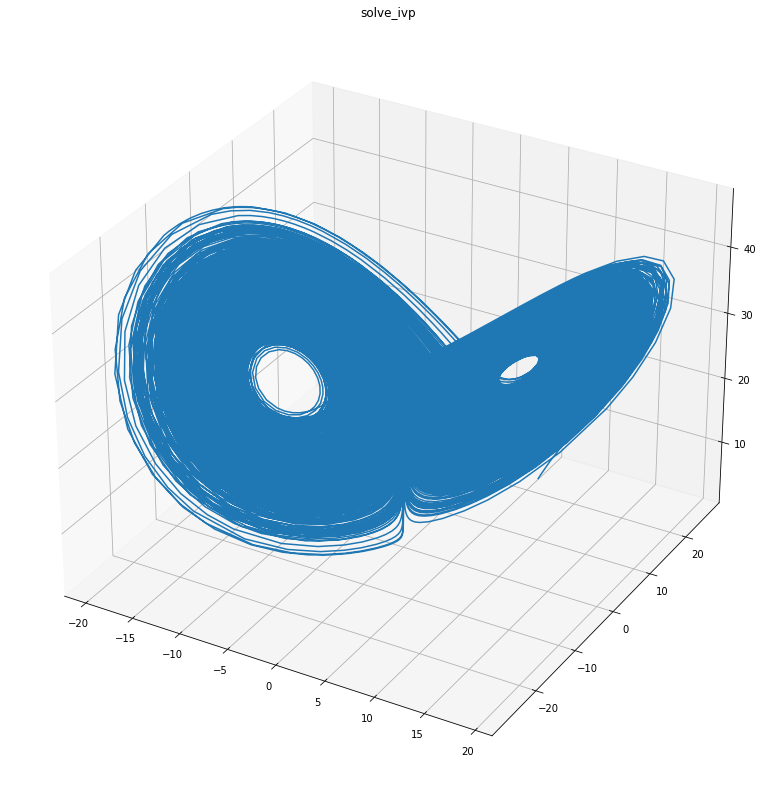

In [30]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0+10**(-8), 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig = plt.figure(figsize=(30,30))
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

plt.show()

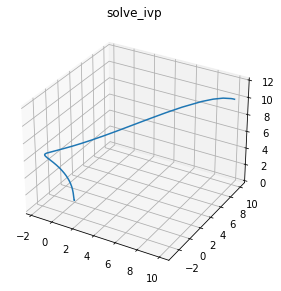

In [31]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 0.5
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0, 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig = plt.figure(figsize=(10,10))
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

plt.show()

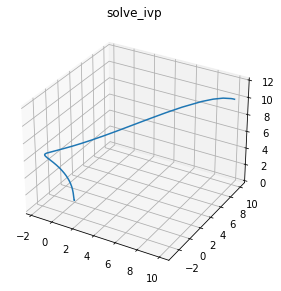

In [32]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 0.5
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0+10**(-8), 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig = plt.figure(figsize=(10,10))
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

plt.show()

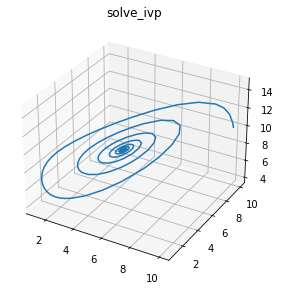

In [33]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 10.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [10.0, 10.0, 10.0]  # Initial state of the system

t_span = (0.0, 1000.0)
 
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')
 
fig = plt.figure(figsize=(10,10))
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

plt.show()